# Ejercicio 1 Caso Final

In [ ]:
%pylab
%matplotlib inline

%config InlineBackend.figure_format = 'retina'

In [2]:
import pandas as pd

auto = pd.read_csv('auto.csv', sep = ',')

target = 'mpg'
features = list(auto.columns)
features.remove('mpg')

# Separación de la variable objetivo y las explicativas
x = auto[features]
y = auto[target]

# Listado de variables disponibles para hacer un modelo.
for feature in features:
    print(feature , ':' , len(set(auto[feature])))

cylinders : 5
displacement : 81
horsepower : 93
weight : 346
acceleration : 95
model_year : 13
origin : 3


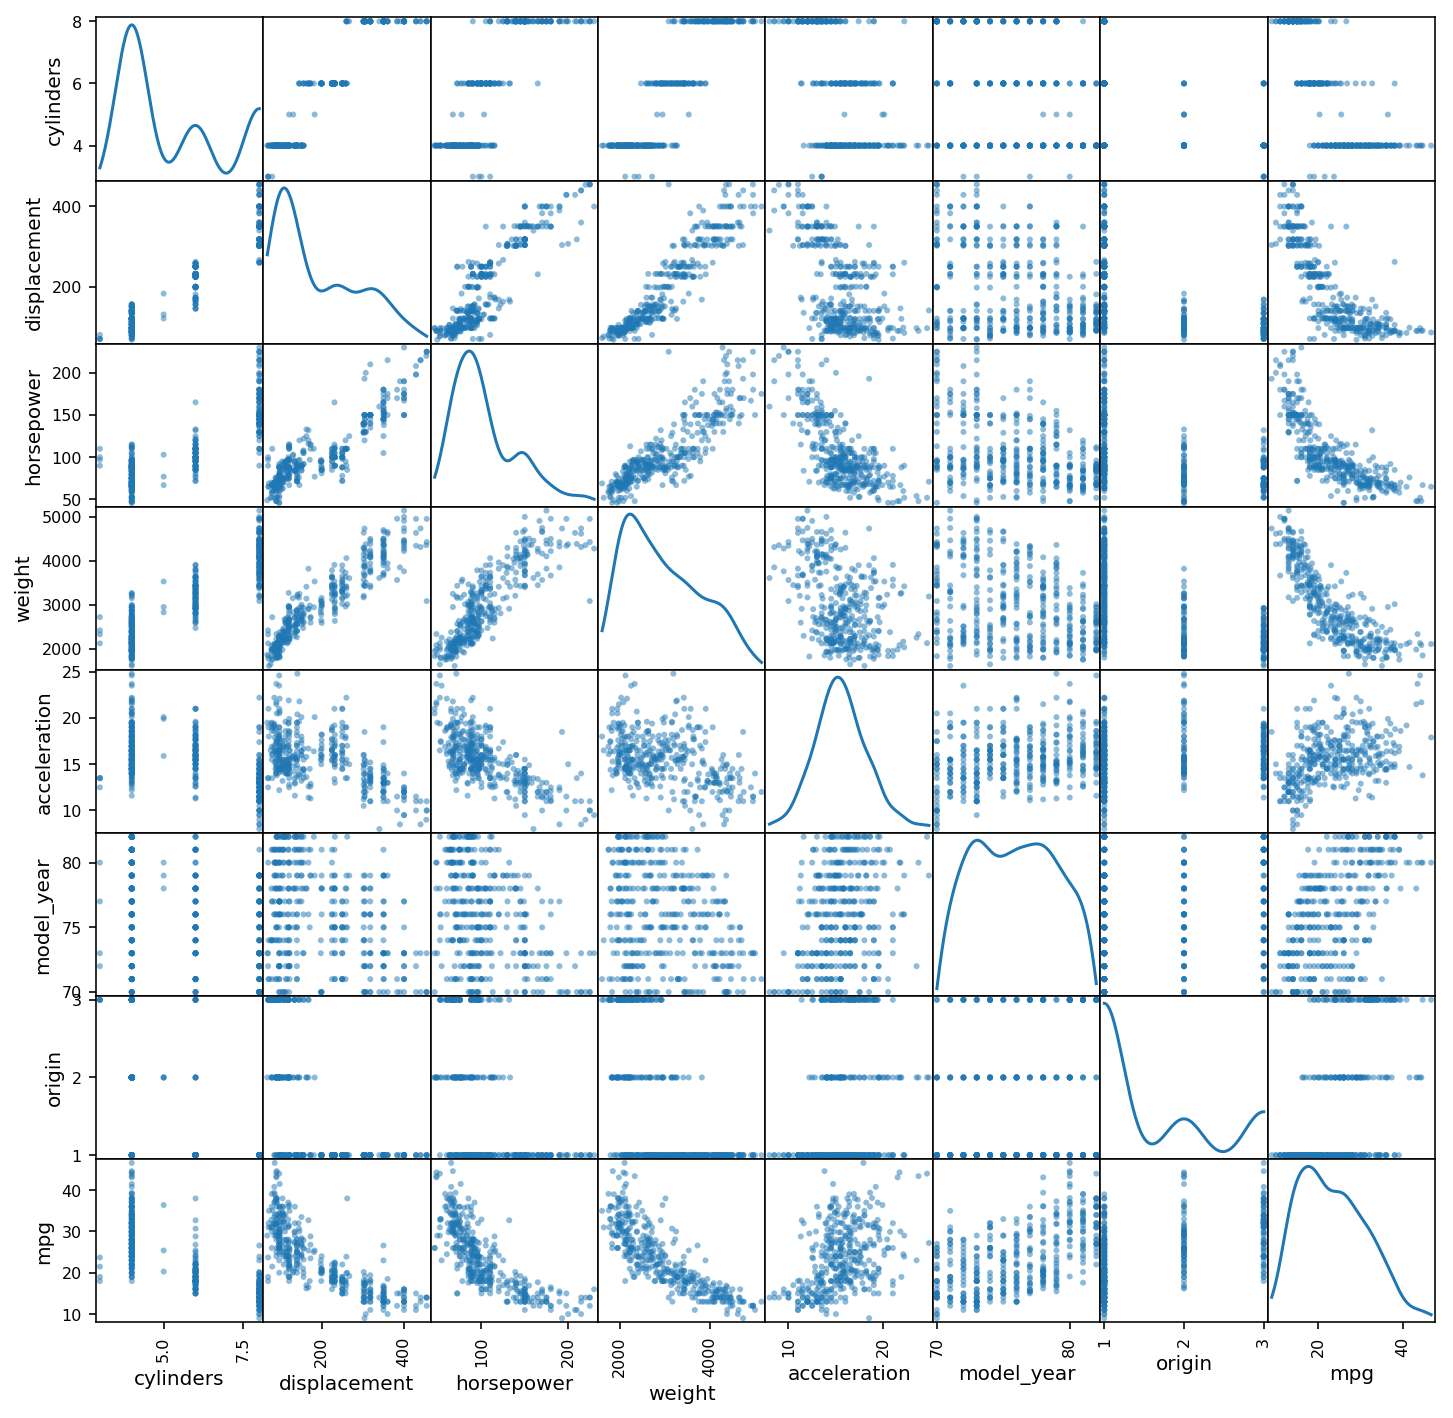

In [3]:
from pandas.plotting import scatter_matrix

scatter_matrix(auto, figsize = (12, 12), diagonal = 'kde');

## Eliminación de variables

In [4]:
features.remove('model_year')

features.remove('origin')

In [5]:
auto[features].head()

,cylinders,displacement,horsepower,weight,acceleration
0,8,307.0,130.0,3504.0,12.0
1,8,350.0,165.0,3693.0,11.5
2,8,318.0,150.0,3436.0,11.0
3,8,304.0,150.0,3433.0,12.0
4,8,302.0,140.0,3449.0,10.5


#### Análisis de las variables continuas
El resto de las variables que quedan son numéricas. Se pueden analizar para ver cómo se relacionan con la variable objetivo.

0      307.0
1      350.0
2      318.0
3      304.0
4      302.0
5      429.0
6      454.0
7      440.0
8      455.0
9      390.0
10     383.0
11     340.0
12     400.0
13     455.0
14     113.0
15     198.0
16     199.0
17     200.0
18      97.0
19      97.0
20     110.0
21     107.0
22     104.0
23     121.0
24     199.0
25     360.0
26     307.0
27     318.0
28     304.0
29      97.0
       ...  
362    112.0
363    112.0
364    112.0
365    112.0
366    135.0
367    151.0
368    140.0
369    105.0
370     91.0
371     91.0
372    105.0
373     98.0
374    120.0
375    107.0
376    108.0
377     91.0
378     91.0
379     91.0
380    181.0
381    262.0
382    156.0
383    232.0
384    144.0
385    135.0
386    151.0
387    140.0
388     97.0
389    135.0
390    120.0
391    119.0
Name: displacement, Length: 392, dtype: float64
0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
5      15.0
6      14.0
7      14.0
8      14.0
9      15.0
10     15.0
11     14.0
12     15.0
13 

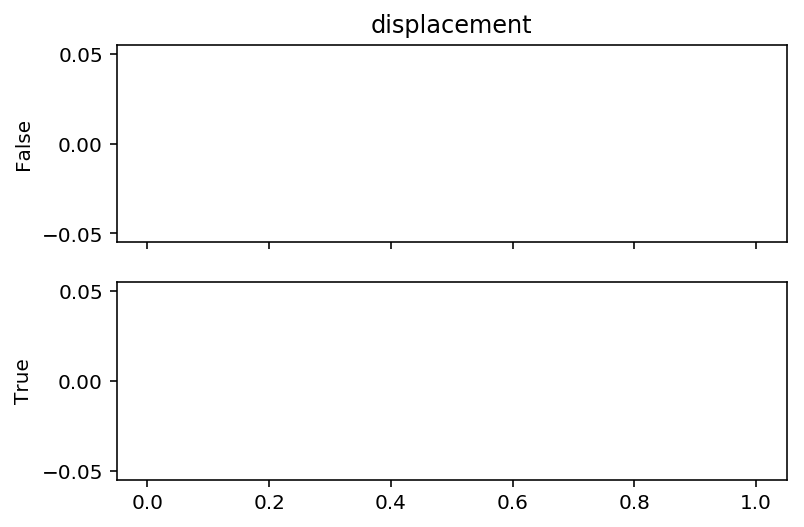

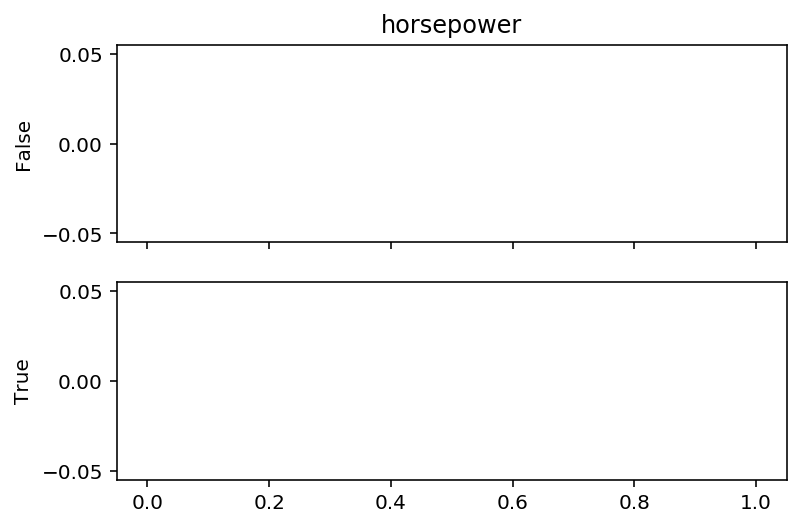

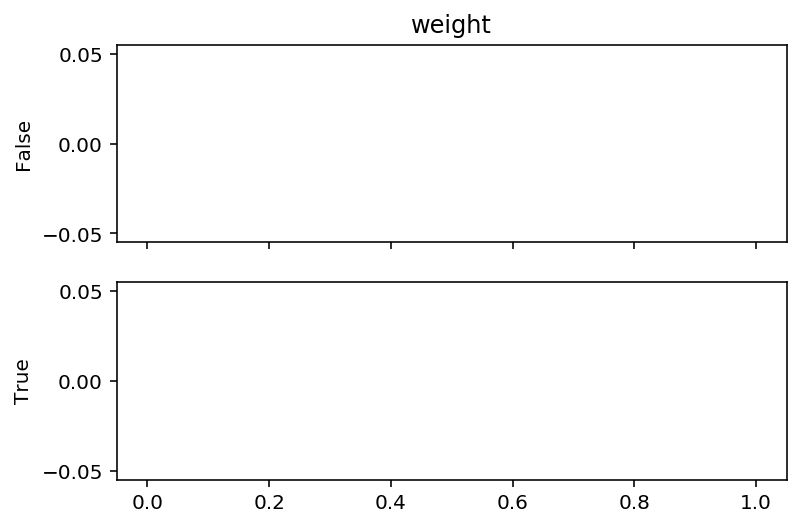

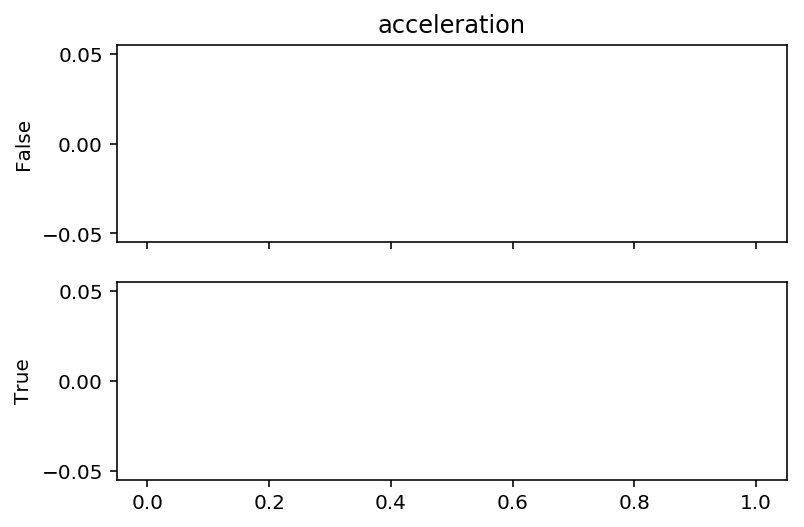

In [9]:
#cuales son categoricas realmente???
categorical = [] 
continuous = ['displacement', 'horsepower', 'weight', 'acceleration']

#aqui tiene pinta de que no se pueden hacer plots con mas de 2 filas
for var in continuous:
    f, axarr = plt.subplots(2, sharex = True) 
    
    print(auto[var])
    print(auto[target])
    axarr[0].hist(auto[var][auto[target]==0])
    axarr[1].hist(auto[var][auto[target]==1])
    
    axarr[0].set_ylabel('False')
    axarr[1].set_ylabel('True')
    axarr[0].set_title(var)